In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

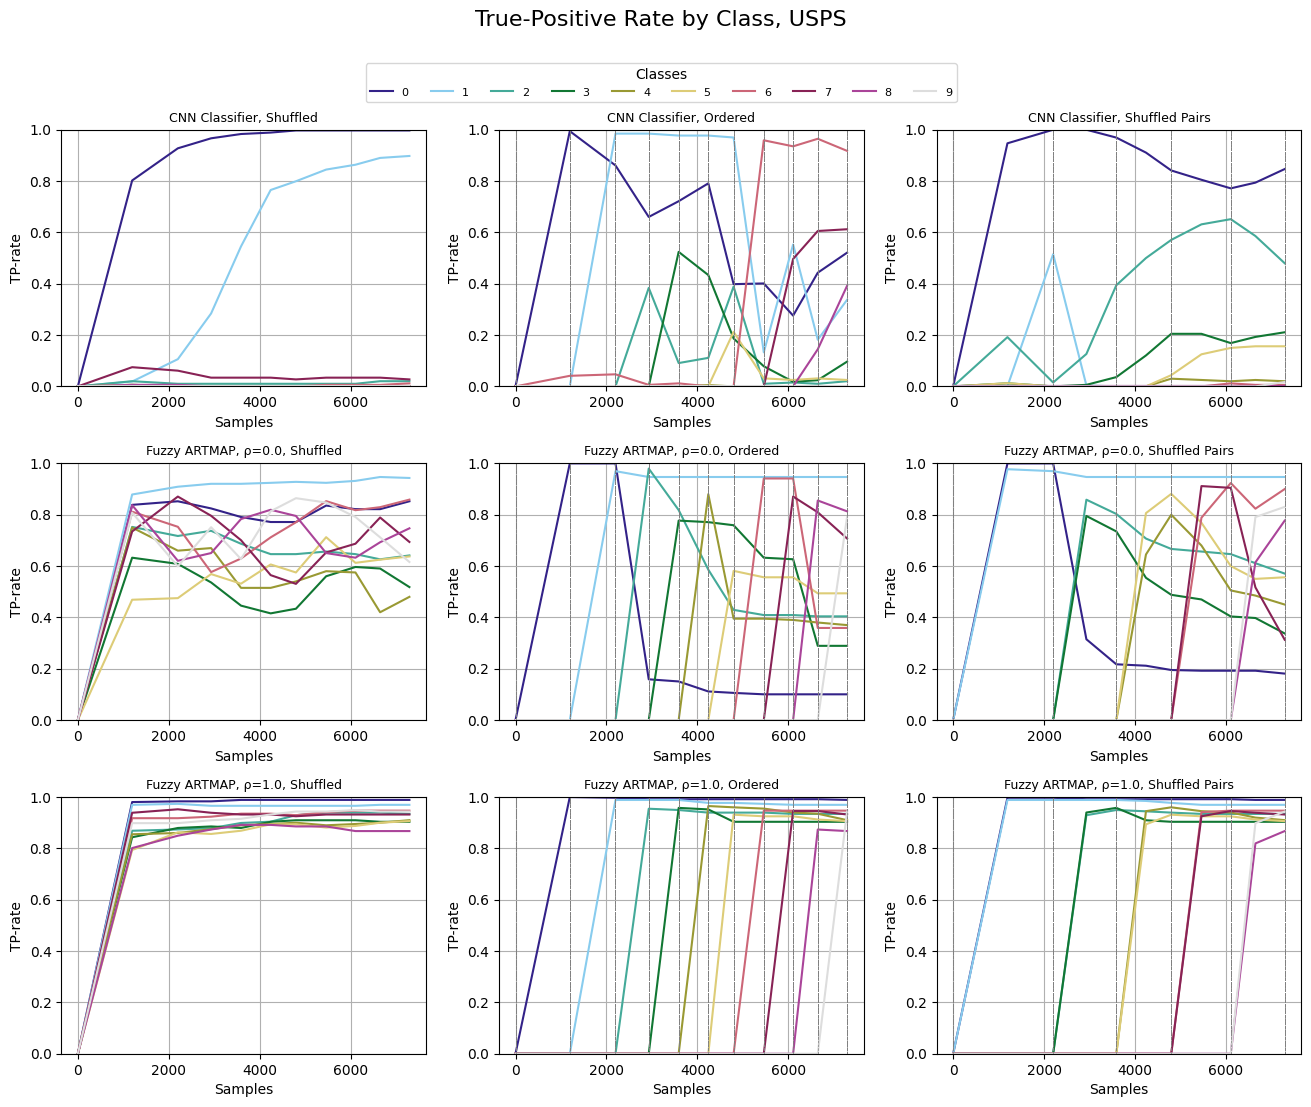

In [14]:
import matplotlib.pyplot as plt
from matplotlib.cm import viridis
import numpy as np
import pandas as pd

tol_colors = [
    "#332288", "#88CCEE", "#44AA99", "#117733", 
    "#999933", "#DDCC77", "#CC6677", "#882255", 
    "#AA4499", "#DDDDDD"
]



data = pd.read_parquet("USPS.parquet")

def rename(row):
    if "ART" in row["model"]:
        return f"{row['model']}, ρ={row['rho']}"
    return row["model"]

data["model"] = data.apply(lambda row: rename(row), axis=1)
data["model"].unique()


# Create subplots with a larger figure size to accommodate legends
models = sorted(data["model"].unique().tolist())
M = len(data["model"].unique())
fig, ax = plt.subplots(M, 3, figsize=(16, 12))  # Adjust figure size for extra space

# Use the first model's target names for the global legend (assumes all models have the same target names)
global_target_names = data[data["model"] == models[0]]["target_names"].iloc[0].tolist()  # Convert to list

for m, model in enumerate(models):
    for s, shuffle in enumerate(["True", "False", "semi"]):
        acc_mat = data[(data["model"] == model) & (data["shuffle"] == shuffle)]["accuracy_by_class_iterative"].iloc[0]

        target_names = data[(data["model"] == model) & (data["shuffle"] == shuffle)]["target_names"].iloc[0]
        acc_mat = acc_mat.reshape((-1, len(target_names)))
        batch_sizes = data[(data["model"] == model) & (data["shuffle"] == shuffle)]["batch_size"].iloc[0]

        for i, target in enumerate(target_names):
            y = acc_mat[:, i].tolist()
            x = np.cumsum(batch_sizes).tolist()
            y.insert(0, 0)
            x.insert(0, 0)
            ax[m, s].plot(x, y, label=target, color=tol_colors[i % len(tol_colors)])

            # Add vertical lines at x points
            if shuffle == "False":
                for x_point in x:
                    ax[m, s].axvline(x=x_point, color='gray', linestyle='--', linewidth=0.5)
            elif shuffle == "semi":
                for x_point in x[::2]:
                    ax[m, s].axvline(x=x_point, color='gray', linestyle='--', linewidth=0.5)

        # Add title
        if shuffle == "True":
            shuffle_text = "Shuffled" 
        elif shuffle == "semi":
            shuffle_text = "Shuffled Pairs"  
        else:
            shuffle_text = "Ordered"
        ax[m, s].set_title(f"{model.replace("ART", " ARTMAP").replace("CNN", "CNN ")}, {shuffle_text}", fontsize=9)
        ax[m, s].set_ylim(0, 1)
        ax[m, s].grid()
        ax[m, s].set_xlabel("Samples")
        ax[m, s].set_ylabel("TP-rate")
        # ax[m, s].set_yscale("log")

# Add a single legend just below the title
fig.legend(
    handles=ax[0, 0].lines[:len(global_target_names)],  # Use the lines from the first plot
    labels=global_target_names,  # Target names as labels
    loc='upper center',
    bbox_to_anchor=(0.5, 0.94),  # Adjust position below the title
    ncol=len(global_target_names),  # Spread across columns
    fontsize=8,
    title="Classes"
)

# Adjust layout to leave space for the legend
fig.subplots_adjust(top=0.88, hspace=0.3)  # Reduce the top margin to leave space for the legend

# Add a main title for the entire figure
fig.suptitle("True-Positive Rate by Class, USPS", fontsize=16, y=0.98)  # Position the title above the legend
plt.savefig("Accuracy_by_class_usps.png")
plt.show()


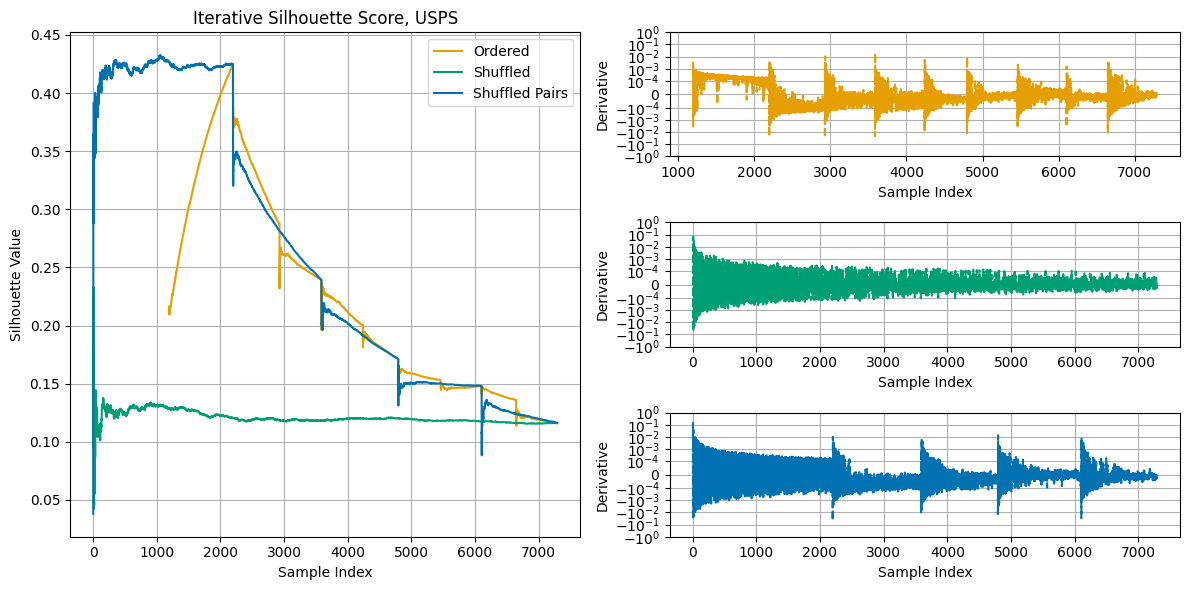

In [15]:
# import pandas as pd
# import matplotlib.pyplot as plt
# import numpy as np
# from matplotlib.colors import ListedColormap

# # Define the color map
# okabe_ito_cmap = ListedColormap([
#     "#E69F00", "#009E73", "#0072B2"
# ])

# # List of shuffles and corresponding filenames
# shuffles = ["False", "True", "semi"]
# file_names = [f"iterative_silhouette_shuffle_{shuffle}.csv" for shuffle in shuffles]

# # Label mapping for the legend and titles
# shuffle_labels = {
#     "False": "Ordered",
#     "True": "Shuffled",
#     "semi": "Shuffled Pairs"
# }

# # Create the figure with gridspec: one main plot and 3 vertically stacked derivative plots
# fig = plt.figure(figsize=(12, 6))
# grid = fig.add_gridspec(3, 4)

# # Main silhouette plot on the left (spans 2 rows vertically)
# main_ax = fig.add_subplot(grid[:, :2])

# # Derivative subplots (stacked vertically on the right)
# derivative_axes = [fig.add_subplot(grid[i, 2:]) for i in range(3)]

# # Iterate over the shuffles, files, and colors
# for i, (shuffle, file_name) in enumerate(zip(shuffles, file_names)):
#     # Load the data
#     data = pd.read_csv(file_name)
    
#     # Extract x and y values
#     x = data["Sample Index"]
#     y = data["Iterative Silhouette"]

#     # Calculate the derivative (finite difference approximation)
#     dy_dx = np.gradient(y, x)

#     # Plot silhouette values on the main subplot
#     main_ax.plot(x, y, label=shuffle_labels[shuffle], color=okabe_ito_cmap(i))
    
#     # Plot derivatives on the corresponding subplot
#     derivative_axes[i].plot(x, dy_dx, label=shuffle_labels[shuffle], color=okabe_ito_cmap(i), linestyle='--')
#     derivative_axes[i].set_ylabel(f"Derivative")
#     #derivative_axes[i].legend()
#     derivative_axes[i].grid(True)

#     # Set symmetric log scale with a linear threshold to highlight small values
#     derivative_axes[i].set_yscale('symlog', linthresh=0.0001)
#     derivative_axes[i].set_ylim([-1, 1])  # Keep consistent scale for visual comparison

# # Configure main silhouette plot
# main_ax.set_title("Iterative Silhouette Score, USPS")
# main_ax.set_xlabel("Sample Index")
# main_ax.set_ylabel("Silhouette Value")
# main_ax.legend()
# main_ax.grid(True)

# # Configure layout and shared axis for derivatives
# for ax in derivative_axes:
#     ax.set_xlabel("Sample Index")

# plt.tight_layout()
# plt.savefig("silhouette_usps.png")
# plt.show()


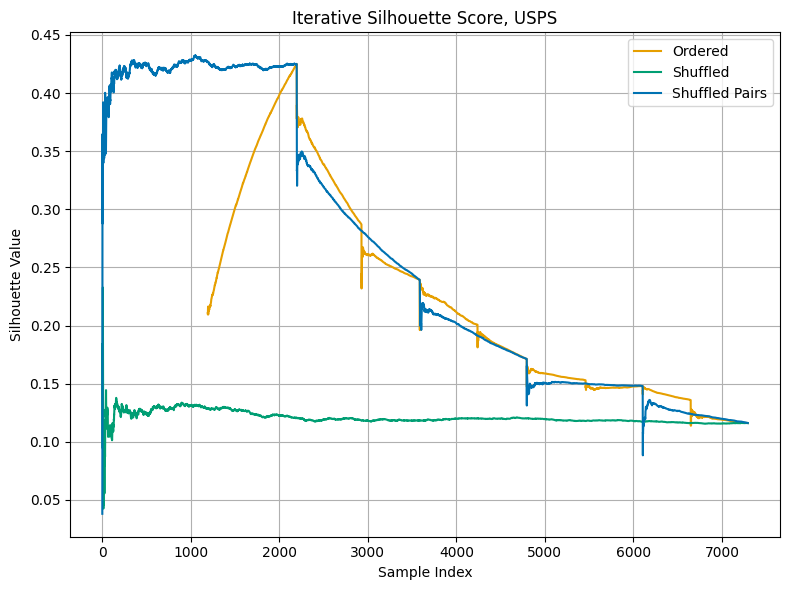

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import ListedColormap

# Define the color map
okabe_ito_cmap = ListedColormap([
    "#E69F00", "#009E73", "#0072B2"
])

# List of shuffles and corresponding filenames
shuffles = ["False", "True", "semi"]
file_names = [f"iterative_silhouette_shuffle_{shuffle}.csv" for shuffle in shuffles]

# Label mapping for the legend and titles
shuffle_labels = {
    "False": "Ordered",
    "True": "Shuffled",
    "semi": "Shuffled Pairs"
}

# Create the figure for the main plot
fig, main_ax = plt.subplots(figsize=(8, 6))

# Iterate over the shuffles, files, and colors
for i, (shuffle, file_name) in enumerate(zip(shuffles, file_names)):
    # Load the data
    data = pd.read_csv(file_name)
    
    # Extract x and y values
    x = data["Sample Index"]
    y = data["Iterative Silhouette"]

    # Plot silhouette values on the main subplot
    main_ax.plot(x, y, label=shuffle_labels[shuffle], color=okabe_ito_cmap(i))

# Configure main silhouette plot
main_ax.set_title("Iterative Silhouette Score, USPS")
main_ax.set_xlabel("Sample Index")
main_ax.set_ylabel("Silhouette Value")
main_ax.legend()
main_ax.grid(True)

plt.tight_layout()
plt.savefig("silhouette_usps.png")
plt.show()


In [18]:
# import numpy as np
# import matplotlib.pyplot as plt
# import seaborn as sns

# # Define the number of models and subplots dynamically
# num_models = len(models)
# fig, axes = plt.subplots(num_models * 2, 10, figsize=(20, num_models * 5))

# for m, model in enumerate(models):
#     for s, shuffle in enumerate(["False"]):
#         # Extract confusion matrix vector and reshape to the list of 10x10 matrices
#         cfm_vec = data[(data["model"] == model) & (data["shuffle"] == shuffle)]["cfm_iterative"].iloc[0]
#         flattened_array = cfm_vec.reshape(10, 100)
#         original_matrices = [matrix.reshape(10, 10) for matrix in flattened_array]  # Reshape to 10x10

#         # Calculate differential matrices (CFM_i - CFM_(i-1))
#         differential_matrices = [original_matrices[i] - original_matrices[i - 1] for i in range(1, len(original_matrices))]

#         # Function to generate diagonal-only annotation matrix
#         def diagonal_annotations(matrix):
#             annot = np.full(matrix.shape, "", dtype=object)  # Create an empty annotation matrix
#             np.fill_diagonal(annot, [f"{val:g}" for val in np.diag(matrix)])  # Annotate diagonal with formatted values
#             return annot

#         # Plot the confusion matrices (annotate diagonals only)
#         for i in range(10):
#             ax = axes[m * 2, i]
#             sns.heatmap(original_matrices[i], annot=diagonal_annotations(original_matrices[i]), fmt='', cmap='Blues', cbar=False, ax=ax)
#             if m == 0:
#                 ax.set_title(f'Batch {i + 1}')
#             ax.set_xlabel('Predicted')
#             ax.set_ylabel('True')

#         # Plot the differential matrices (diagonal annotations only)
#         for i in range(9):
#             ax = axes[m * 2 + 1, i + 1]  # Offset by 1 to center between batches
#             sns.heatmap(differential_matrices[i], annot=diagonal_annotations(differential_matrices[i]), fmt='', cmap='coolwarm', center=0, cbar=False, ax=ax)
#             ax.set_xlabel('Predicted')
#             ax.set_ylabel('True')

#         # Remove the empty axis on the bottom row (first column)
#         axes[m * 2 + 1, 0].axis('off')

# # Adjust layout once, globally
# plt.tight_layout()
# plt.suptitle('Optimized Visualization of Confusion Matrices and Differential Matrices', fontsize=18, y=1.02)
# plt.show()


In [19]:
# import numpy as np
# import pandas as pd

# # Dictionary to store hypothesis test results
# hypothesis_results = {}

# for model in models:
#     for shuffle in ["False"]:
#         # Extract confusion matrix vector and reshape into a list of 10x10 matrices
#         cfm_vec = data[(data["model"] == model) & (data["shuffle"] == shuffle)]["cfm_iterative"].iloc[0]
#         flattened_array = cfm_vec.reshape(10, 100)
#         original_matrices = [matrix.reshape(10, 10) for matrix in flattened_array]

#         for class_index in range(10):
#             tpr_values = []
#             fpr_values = []
#             tpr_violations = []
#             fpr_violations = []

#             # Determine the batch where the class was introduced
#             try:
#                 introduction_batch = next(i for i, matrix in enumerate(original_matrices) if matrix[class_index, class_index] > 0)
#             except StopIteration:
#                 print(f"Class {class_index} not found in any batch for Model: {model}, Shuffle: {shuffle}")
#                 continue

#             # Collect TPR and FPR from the batch after introduction onward
#             for batch in range(introduction_batch + 1, 10):
#                 matrix = original_matrices[batch]
#                 tp = matrix[class_index, class_index]
#                 fn = np.sum(matrix[class_index, :]) - tp
#                 fp = np.sum(matrix[:, class_index]) - tp
#                 tn = np.sum(matrix) - (tp + fn + fp)

#                 # Calculate TPR and FPR, avoiding division by zero
#                 tpr = tp / (tp + fn) if (tp + fn) > 0 else 0
#                 fpr = fp / (fp + tn) if (fp + tn) > 0 else 0

#                 tpr_values.append(tpr)
#                 fpr_values.append(fpr)

#             # Check for monotonicity violations
#             for i in range(1, len(tpr_values)):
#                 if tpr_values[i] > tpr_values[i - 1]:  # TPR increased
#                     tpr_violations.append({
#                         "Batch": introduction_batch + 1 ,
#                         "Increase": tpr_values[i] - tpr_values[i - 1]
#                     })
#                 if fpr_values[i] > fpr_values[i - 1]:  # FPR increased
#                     fpr_violations.append({
#                         "Batch": introduction_batch + 1 ,
#                         "Increase": fpr_values[i] - fpr_values[i - 1]
#                     })

#             # Store results
#             hypothesis_results[(model, shuffle, class_index)] = {
#                 "TPR Monotonic": len(tpr_violations) == 0,
#                 "FPR Monotonic": len(fpr_violations) == 0,
#                 "TPR Values": tpr_values,
#                 "FPR Values": fpr_values,
#                 "TPR Violations": tpr_violations,
#                 "FPR Violations": fpr_violations,
#                 "Introduction Batch": introduction_batch
#             }


KeyError: 'model'

In [135]:
violations

,Model,Shuffle,Class,TPR Monotonic,FPR Monotonic,TPR Violations,FPR Violations,Introduction Batch
1,CNNClassifier,False,1,False,False,"[{'Batch': 3, 'Increase': 0.04166666666666674}]","[{'Batch': 3, 'Increase': 0.009179575444635686}]",1
5,CNNClassifier,False,5,False,True,"[{'Batch': 8, 'Increase': 0.29375}]",[],6


In [20]:
# import numpy as np
# import matplotlib.pyplot as plt
# # Colormap for class-based color distinction
# cmap = plt.get_cmap('tab10')

# # Iterate over the hypothesis_results to find violations
# for (model, shuffle, class_index), results in hypothesis_results.items():
#     # Only plot if there are violations in either TPR or FPR
#     if not results["TPR Monotonic"] or not results["FPR Monotonic"]:
#         # Create a plot for this model-shuffle combination
#         fig, ax = plt.subplots(figsize=(12, 6))

#         # Plot TPR and FPR for all classes
#         for cls_idx in range(10):
#             key = (model, shuffle, cls_idx)
#             if key in hypothesis_results:
#                 cls_results = hypothesis_results[key]
#                 tpr_values = cls_results["TPR Values"]
#                 fpr_values = cls_results["FPR Values"]
#                 introduction_batch = cls_results["Introduction Batch"]

#                 # Batches corresponding to each TPR and FPR value
#                 batches = list(range(introduction_batch, introduction_batch + len(tpr_values)))

#                 # Plot TPR and FPR with appropriate line styles
#                 ax.plot(batches, tpr_values, marker='o', linestyle='-', color=cmap(cls_idx), label=f'Class {cls_idx} TPR')
#                 ax.plot(batches, fpr_values, marker='x', linestyle='--', color=cmap(cls_idx), label=f'Class {cls_idx} FPR')

#         # Annotate TPR violations
#         for violation in results["TPR Violations"]:
#             batch = violation["Batch"]
#             increase = violation["Increase"]
#             value_at_violation = results["TPR Values"][batch - introduction_batch]
#             ax.annotate(
#                 f'+{increase:.2f}',
#                 xy=(batch, value_at_violation),
#                 xytext=(batch, value_at_violation + 0.05),
#                 ha='center',
#                 arrowprops=dict(arrowstyle='->', facecolor='red', lw=1.5),
#                 fontsize=9,
#                 color='red'
#             )

#         # Annotate FPR violations
#         for violation in results["FPR Violations"]:
#             batch = violation["Batch"]
#             increase = violation["Increase"]
#             value_at_violation = results["FPR Values"][batch - introduction_batch]
#             ax.annotate(
#                 f'+{increase:.2f}',
#                 xy=(batch, value_at_violation),
#                 xytext=(batch, value_at_violation + 0.05),
#                 ha='center',
#                 arrowprops=dict(arrowstyle='->', facecolor='blue', lw=1.5),
#                 fontsize=9,
#                 color='blue'
#             )

#         # Add labels, title, and legend
#         ax.set_xlabel('Batch Index')
#         ax.set_ylabel('Rate')
#         ax.set_title(f'TPR and FPR per Class\nModel: {model}, Shuffle: {shuffle}, Class {class_index}')
#         ax.legend(loc='upper right')

#         # Display the plot
#         plt.tight_layout()
#         plt.show()

C:\Users\nikla\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\umap\umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
C:\Users\nikla\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\umap\umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


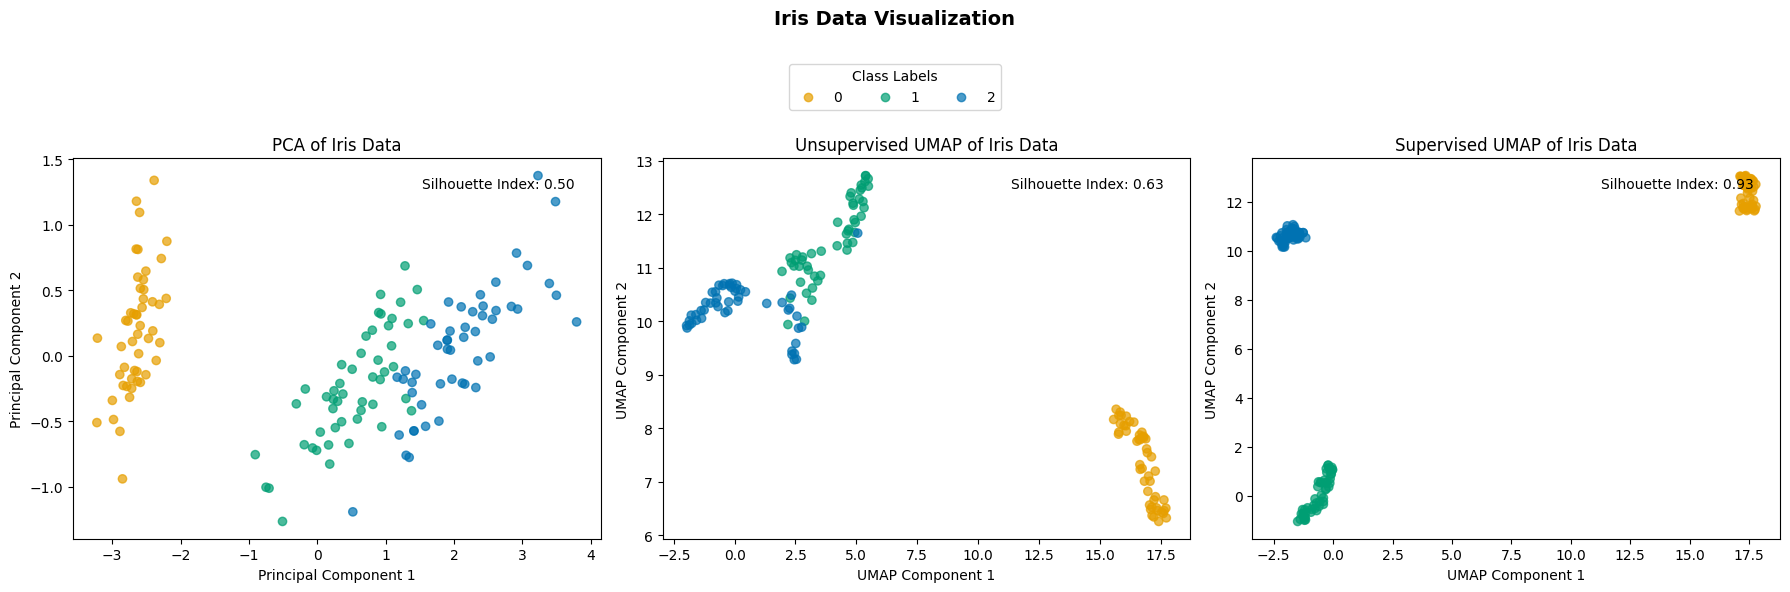

In [2]:
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
import umap
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import datasets
iris = datasets.load_iris()

X_train = iris.data
y_train = iris.target
target_names = iris.target_names

# Okabe-Ito colormap without gray color
okabe_ito_cmap = ListedColormap([
    "#E69F00", "#009E73",
    "#0072B2",
])

# Dimensionality reduction
pca = PCA(n_components=4)
X_pca = pca.fit_transform(X_train)

# Supervised UMAP (with labels)
reducer_supervised = umap.UMAP(n_components=4, random_state=42)
X_umap_supervised = reducer_supervised.fit_transform(X_train, y=y_train)

# Unsupervised UMAP (without labels)
reducer_unsupervised = umap.UMAP(n_components=4, random_state=42)
X_umap_unsupervised = reducer_unsupervised.fit_transform(X_train)

# Silhouette scores
sil_score_pca = silhouette_score(X_pca, y_train)
sil_score_umap_supervised = silhouette_score(X_umap_supervised, y_train)
sil_score_umap_unsupervised = silhouette_score(X_umap_unsupervised, y_train)

# Plotting side-by-side
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharex=False, sharey=False)

# PCA plot
scatter_pca = axes[0].scatter(X_pca[:, 0], X_pca[:, 1], c=y_train, cmap=okabe_ito_cmap, alpha=0.7)
axes[0].set_title("PCA of Iris Data")
axes[0].set_xlabel("Principal Component 1")
axes[0].set_ylabel("Principal Component 2")
axes[0].text(0.95, 0.95, f'Silhouette Index: {sil_score_pca:.2f}', 
             transform=axes[0].transAxes, fontsize=10, va='top', ha='right')

# Unsupervised UMAP plot
scatter_umap_unsupervised = axes[1].scatter(X_umap_unsupervised[:, 0], X_umap_unsupervised[:, 1], 
                                            c=y_train, cmap=okabe_ito_cmap, alpha=0.7)
axes[1].set_title("Unsupervised UMAP of Iris Data")
axes[1].set_xlabel("UMAP Component 1")
axes[1].set_ylabel("UMAP Component 2")
axes[1].text(0.95, 0.95, f'Silhouette Index: {sil_score_umap_unsupervised:.2f}', 
             transform=axes[1].transAxes, fontsize=10, va='top', ha='right')

# Supervised UMAP plot
scatter_umap_supervised = axes[2].scatter(X_umap_supervised[:, 0], X_umap_supervised[:, 1], 
                                          c=y_train, cmap=okabe_ito_cmap, alpha=0.7)
axes[2].set_title("Supervised UMAP of Iris Data")
axes[2].set_xlabel("UMAP Component 1")
axes[2].set_ylabel("UMAP Component 2")
axes[2].text(0.95, 0.95, f'Silhouette Index: {sil_score_umap_supervised:.2f}', 
             transform=axes[2].transAxes, fontsize=10, va='top', ha='right')

# Shared legend
fig.legend(*scatter_pca.legend_elements(), title="Class Labels", loc="upper center", 
           bbox_to_anchor=(0.5, 0.9), ncol=4)

# Main title for the entire figure
fig.suptitle("Iris Data Visualization", fontsize=14, fontweight='bold')

plt.tight_layout(rect=[0, 0, 1, 0.85])
plt.savefig("iris_projections.png")
plt.show()


C:\Users\nikla\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\umap\umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
C:\Users\nikla\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\umap\umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


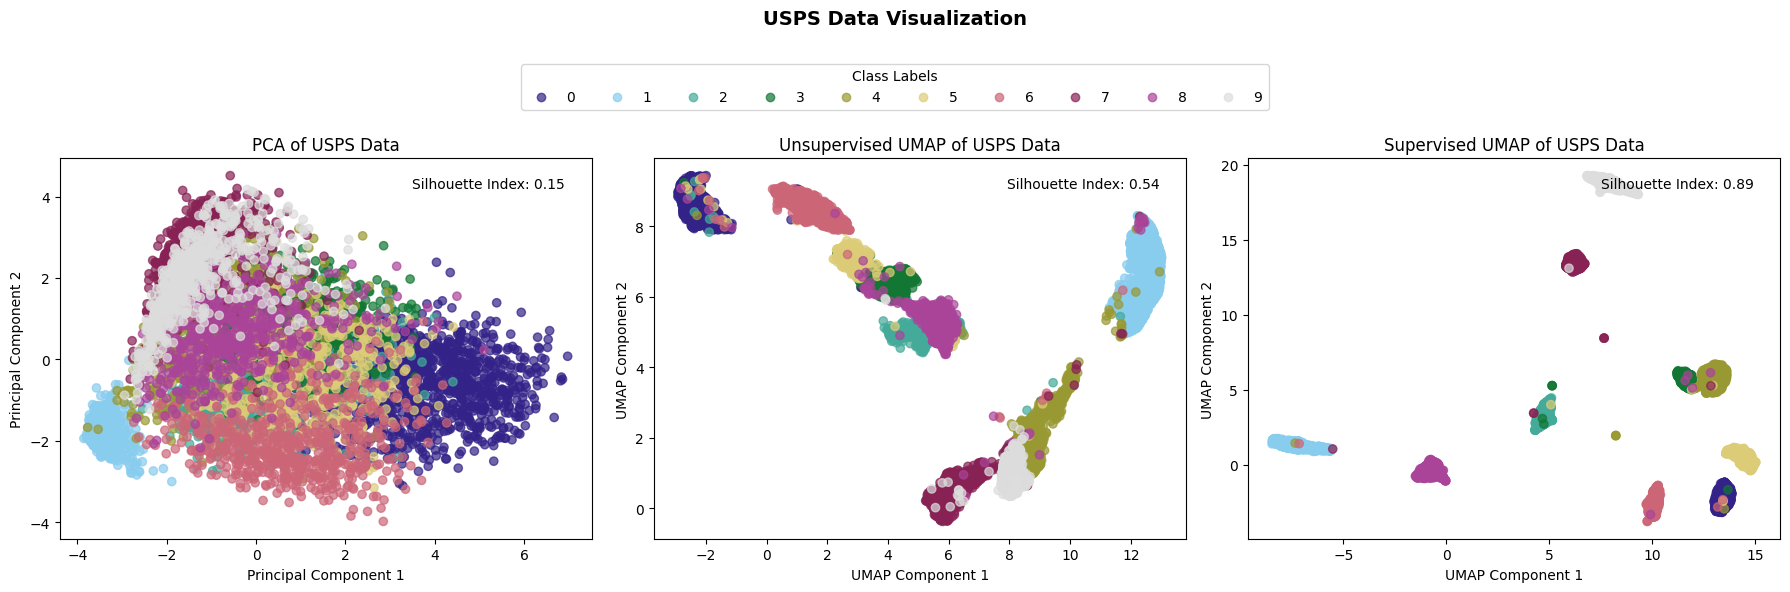

In [7]:
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
import umap
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from Data import load_usps


X_train, y_train, X_test, y_test = load_usps(
    random_state=42,
    shuffle=False
)
target_names = list(map(str, range(10)))

# Paul Tol colormap without gray color
tol_colors = [
    "#332288", "#88CCEE", "#44AA99", "#117733", 
    "#999933", "#DDCC77", "#CC6677", "#882255", 
    "#AA4499", "#DDDDDD"
]
tol_cmap = ListedColormap(tol_colors)

# Dimensionality reduction
pca = PCA(n_components=4)
X_pca = pca.fit_transform(X_train)

# Supervised UMAP (with labels)
reducer_supervised = umap.UMAP(n_components=4, random_state=42)
X_umap_supervised = reducer_supervised.fit_transform(X_train, y=y_train)

# Unsupervised UMAP (without labels)
reducer_unsupervised = umap.UMAP(n_components=4, random_state=42)
X_umap_unsupervised = reducer_unsupervised.fit_transform(X_train)

# Silhouette scores
sil_score_pca = silhouette_score(X_pca, y_train)
sil_score_umap_supervised = silhouette_score(X_umap_supervised, y_train)
sil_score_umap_unsupervised = silhouette_score(X_umap_unsupervised, y_train)

# Plotting side-by-side
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharex=False, sharey=False)

# PCA plot
scatter_pca = axes[0].scatter(X_pca[:, 0], X_pca[:, 1], c=y_train, cmap=tol_cmap, alpha=0.7)
axes[0].set_title("PCA of USPS Data")
axes[0].set_xlabel("Principal Component 1")
axes[0].set_ylabel("Principal Component 2")
axes[0].text(0.95, 0.95, f'Silhouette Index: {sil_score_pca:.2f}', 
             transform=axes[0].transAxes, fontsize=10, va='top', ha='right')

# Unsupervised UMAP plot
scatter_umap_unsupervised = axes[1].scatter(X_umap_unsupervised[:, 0], X_umap_unsupervised[:, 1], 
                                            c=y_train, cmap=tol_cmap, alpha=0.7)
axes[1].set_title("Unsupervised UMAP of USPS Data")
axes[1].set_xlabel("UMAP Component 1")
axes[1].set_ylabel("UMAP Component 2")
axes[1].text(0.95, 0.95, f'Silhouette Index: {sil_score_umap_unsupervised:.2f}', 
             transform=axes[1].transAxes, fontsize=10, va='top', ha='right')

# Supervised UMAP plot
scatter_umap_supervised = axes[2].scatter(X_umap_supervised[:, 0], X_umap_supervised[:, 1], 
                                          c=y_train, cmap=tol_cmap, alpha=0.7)
axes[2].set_title("Supervised UMAP of USPS Data")
axes[2].set_xlabel("UMAP Component 1")
axes[2].set_ylabel("UMAP Component 2")
axes[2].text(0.95, 0.95, f'Silhouette Index: {sil_score_umap_supervised:.2f}', 
             transform=axes[2].transAxes, fontsize=10, va='top', ha='right')

# Shared legend
fig.legend(*scatter_pca.legend_elements(), title="Class Labels", loc="upper center", 
           bbox_to_anchor=(0.5, 0.9), ncol=10)

# Main title for the entire figure
fig.suptitle("USPS Data Visualization", fontsize=14, fontweight='bold')

plt.tight_layout(rect=[0, 0, 1, 0.85])
plt.savefig("usps_projections.png")
plt.show()


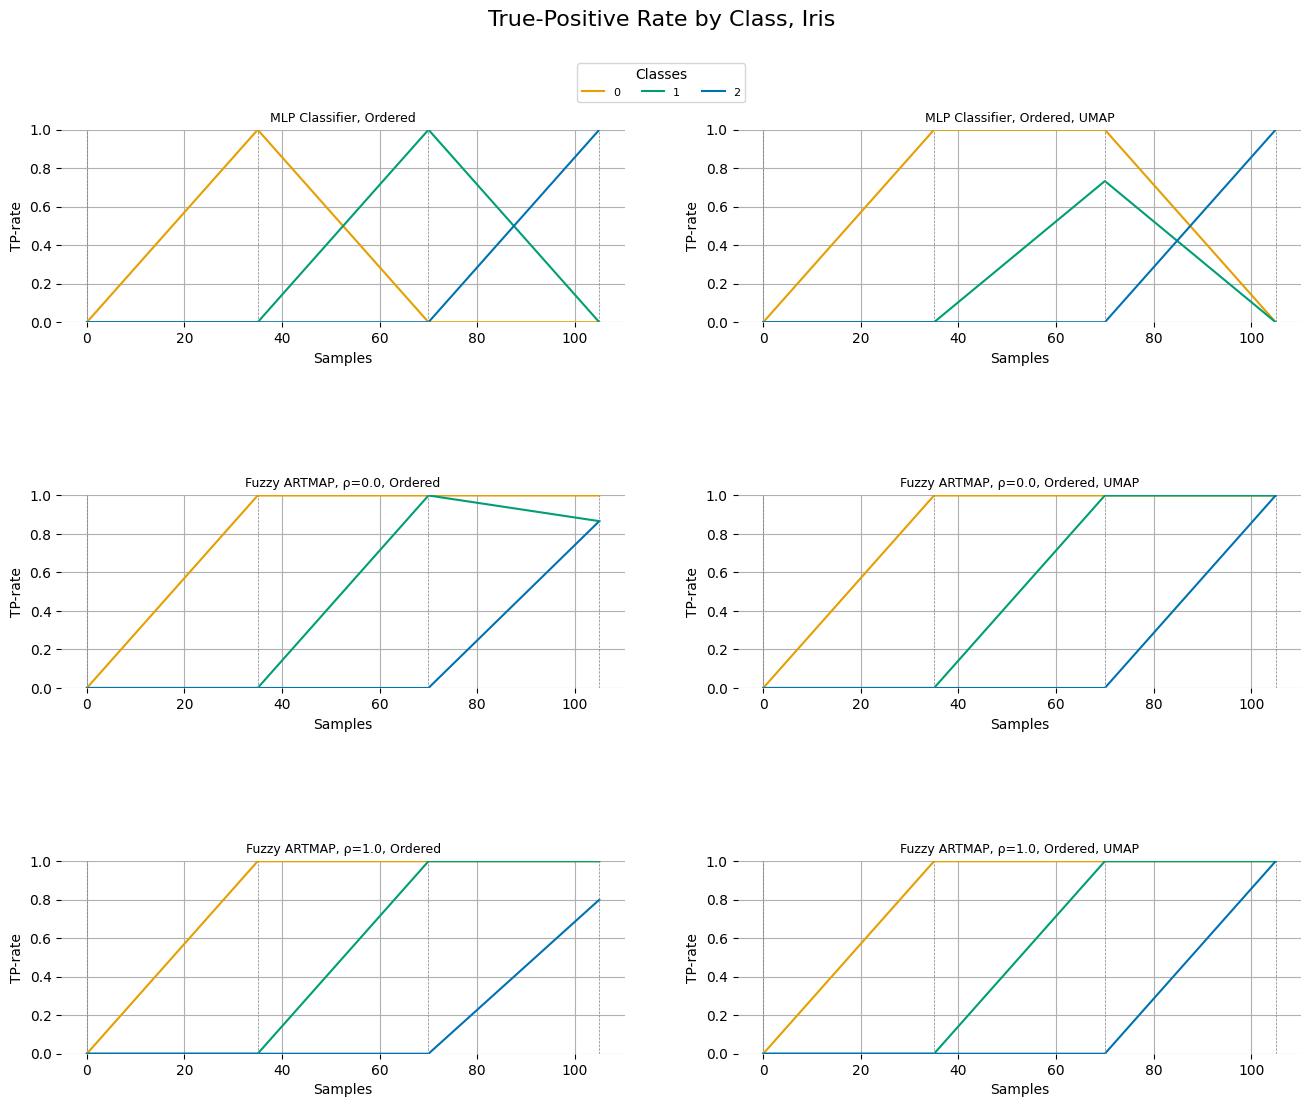

In [22]:
import matplotlib.pyplot as plt
from matplotlib.cm import viridis
import numpy as np
import pandas as pd

tol_colors = [
    "#E69F00", "#009E73",
    "#0072B2",
]



data1 = pd.read_parquet("iris.parquet")
data1 = data1.assign(prep = None)

data2 = pd.read_parquet("iris_umap.parquet")
data2 = data2.assign(prep = "umap")
data = pd.concat([data1, data2], ignore_index=True)

def rename(row):
    if "ART" in row["model"]:
        return f"{row['model']}, ρ={row['rho']}"
    return row["model"]

data["model"] = data.apply(lambda row: rename(row), axis=1)

def rename_shuffle(row):
    if row["prep"] is not None:
        return f"{row['shuffle']}, UMAP"
    else:
        return row["shuffle"]

data["shuffle"] = data.apply(lambda row: rename_shuffle(row), axis=1)


# Create subplots with a larger figure size to accommodate legends
models = sorted(data["model"].unique().tolist())
M = len(models)
fig, ax = plt.subplots(M, 2, figsize=(16, 12))  # Adjust figure size for extra space

# Use the first model's target names for the global legend (assumes all models have the same target names)
global_target_names = data[data["model"] == models[0]]["target_names"].iloc[0].tolist()  # Convert to list

for m, model in enumerate(models):
    for s, shuffle in enumerate(["False", "False, UMAP"]):
        acc_mat = data[(data["model"] == model) & (data["shuffle"] == shuffle)]["accuracy_by_class_iterative"].iloc[0]

        target_names = data[(data["model"] == model) & (data["shuffle"] == shuffle)]["target_names"].iloc[0]
        acc_mat = acc_mat.reshape((-1, len(target_names)))
        batch_sizes = data[(data["model"] == model) & (data["shuffle"] == shuffle)]["batch_size"].iloc[0]

        for i, target in enumerate(target_names):
            y = acc_mat[:, i].tolist()
            x = np.cumsum(batch_sizes).tolist()
            y.insert(0, 0)
            x.insert(0, 0)
            ax[m, s].plot(x, y, label=target, color=tol_colors[i % len(tol_colors)])

            # Add vertical lines at x points
            if i == len(target_names)-1:
                for x_point in x:
                    ax[m, s].axvline(x=x_point, color='gray', linestyle='--', linewidth=0.5)

        # Add title
        shuffle_text = shuffle.replace("False","Ordered")
        ax[m, s].set_title(f"{model.replace("ART", " ARTMAP").replace("CustomMLP", "MLP ")}, {shuffle_text}", fontsize=9)
        ax[m, s].set_ylim(0, 1)
        ax[m, s].grid()
        ax[m, s].set_xlabel("Samples")
        ax[m, s].set_ylabel("TP-rate")
        ax[m, s].spines['top'].set_visible(False)
        ax[m, s].spines['right'].set_visible(False)
        ax[m, s].spines['bottom'].set_visible(False)
        ax[m, s].spines['left'].set_visible(False)
        # ax[m, s].set_yscale("log")

# Add a single legend just below the title
fig.legend(
    handles=ax[0, 0].lines[:3],  # Use the lines from the first plot
    labels=global_target_names,  # Target names as labels
    loc='upper center',
    bbox_to_anchor=(0.5, 0.94),  # Adjust position below the title
    ncol=len(global_target_names),  # Spread across columns
    fontsize=8,
    title="Classes"
)

# Adjust layout to leave space for the legend
fig.subplots_adjust(top=0.88, hspace=0.9)  # Reduce the top margin to leave space for the legend

# Add a main title for the entire figure
fig.suptitle("True-Positive Rate by Class, Iris", fontsize=16, y=0.98)  # Position the title above the legend
plt.savefig("Accuracy_by_class_iris.png")
plt.show()


In [220]:
import numpy as np
from sklearn.neural_network import MLPClassifier

class CustomMLPClassifier(MLPClassifier):
    def __init__(
        self,
        hidden_layer_sizes=(100,),
        activation="relu",
        solver="adam",
        alpha=0.0001,
        batch_size="auto",
        learning_rate="constant",
        learning_rate_init=0.001,
        power_t=0.5,
        max_iter=200,
        shuffle=True,
        random_state=None,
        tol=1e-4,
        verbose=False,
        warm_start=False,
        momentum=0.9,
        nesterovs_momentum=True,
        early_stopping=False,
        validation_fraction=0.1,
        beta_1=0.9,
        beta_2=0.999,
        epsilon=1e-8,
        n_iter_no_change=10,
        max_fun=15000,
    ):
        # Pass all parameters to the base class
        super().__init__(
            hidden_layer_sizes=hidden_layer_sizes,
            activation=activation,
            solver=solver,
            alpha=alpha,
            batch_size=batch_size,
            learning_rate=learning_rate,
            learning_rate_init=learning_rate_init,
            power_t=power_t,
            max_iter=max_iter,
            shuffle=shuffle,
            random_state=random_state,
            tol=tol,
            verbose=verbose,
            warm_start=warm_start,
            momentum=momentum,
            nesterovs_momentum=nesterovs_momentum,
            early_stopping=early_stopping,
            validation_fraction=validation_fraction,
            beta_1=beta_1,
            beta_2=beta_2,
            epsilon=epsilon,
            n_iter_no_change=n_iter_no_change,
            max_fun=max_fun,
        )
        self._weights_initialized = False  # Track if weights have been initialized

    def _initialize_weights_xavier(self):
        """Custom Xavier initialization for weights and biases."""
        for layer_idx in range(len(self.coefs_)):
            n_in = self.coefs_[layer_idx].shape[0]
            n_out = self.coefs_[layer_idx].shape[1]
            limit = np.sqrt(6 / (n_in + n_out))
            
            # Xavier initialization for weights
            self.coefs_[layer_idx] = np.random.uniform(-limit, limit, size=self.coefs_[layer_idx].shape)
            
            # Initialize biases to small values near zero
            self.intercepts_[layer_idx] = np.random.uniform(-0.01, 0.01, size=self.intercepts_[layer_idx].shape)

    def partial_fit(self, X, y, classes=None):
        # Initialize weights only on the first call to partial_fit
        if not self._weights_initialized:
            # Call the parent class partial_fit to initialize the internal structure
            super().partial_fit(X, y, classes=classes)
            # Apply custom Xavier initialization
            self._initialize_weights_xavier()
            self._weights_initialized = True  # Mark as initialized
        return super().partial_fit(X, y, classes=classes)


Class distribution in training set: {0: 35, 1: 35, 2: 35}
Batch 1: Start 0, End 35, Classes [0]
Predictions after Batch 1: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0]
Batch 2: Start 35, End 70, Classes [1]
Predictions after Batch 2: [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1]
Batch 3: Start 70, End 105, Classes [2]
Predictions after Batch 3: [2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2]


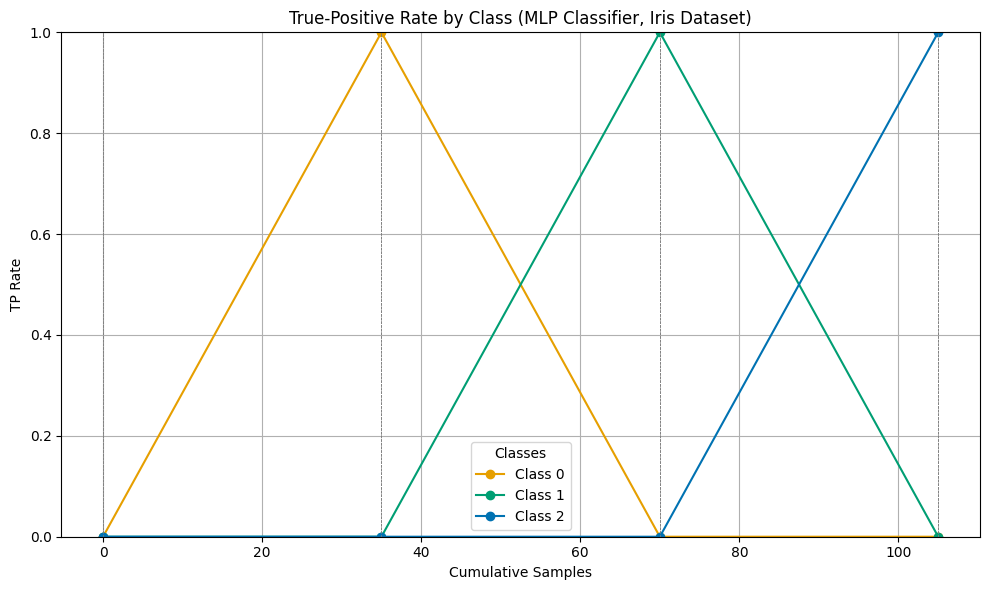

In [223]:
# import matplotlib.pyplot as plt
# from matplotlib.cm import viridis
# from sklearn import datasets
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import precision_score, accuracy_score, f1_score, recall_score, confusion_matrix
# import numpy as np

# # Define constants
# RANDOM_STATE = 42
# SHUFFLE = False
# USE_UMAP = False

# MLP_PARAMS = {
#     "hidden_layer_sizes": (10,),  # Increased capacity
#     "activation": 'relu',
#     "solver": 'sgd',
#     "alpha": 0.0001,  # Reduced regularization
#     "batch_size": 1,
#     "learning_rate": 'constant',
#     "learning_rate_init": 0.01,  # Increased learning rate
#     "max_iter": 500,  # Allow more iterations
#     "shuffle": False,
#     "random_state": 42,
#     "tol": 1e-7,
#     "momentum": 0.0,
#     "nesterovs_momentum": False,
#     "n_iter_no_change": 200,
# }



# def step_train(cls, X_train, y_train, X_test, y_test):
#     metrics = []
#     target_names = sorted(np.unique(y_test).tolist())

#     # Identify class-change indices to form batches
#     change_indices = np.where(np.diff(np.sort(y_train)) != 0)[0] + 1
#     change_indices = np.concatenate(([0], change_indices, [len(y_train)]))
#     batch_idxs = list(zip(change_indices[:-1], change_indices[1:]))

#     # Train over batches
#     for batch_num, (start_idx, end_idx) in enumerate(batch_idxs):
#         X_batch = X_train[start_idx:end_idx]
#         y_batch = y_train[start_idx:end_idx]

#         print(f"Batch {batch_num + 1}: Start {start_idx}, End {end_idx}, Classes {np.unique(y_batch)}")

#         # Perform partial fit on batch
#         cls.partial_fit(X_batch, y_batch, classes=target_names)
#         y_pred = cls.predict(X_test)

#         print(f"Predictions after Batch {batch_num + 1}: {y_pred}")

#         # Compute evaluation metrics
#         acc = accuracy_score(y_test, y_pred)
#         pre = precision_score(y_test, y_pred, average="weighted", zero_division=np.nan)
#         f1 = f1_score(y_test, y_pred, average="weighted", zero_division=np.nan)
#         rec = recall_score(y_test, y_pred, average="weighted", zero_division=np.nan)
#         cfm = confusion_matrix(y_test, y_pred)

#         acc_by_class = {
#             str(name): (sum(y_pred[y_test == name] == name) / sum(y_test == name))
#             for name in target_names
#         }

#         metrics.append(
#             {
#                 "batch_start": start_idx,
#                 "batch_end": end_idx,
#                 "accuracy": acc,
#                 "precision": pre,
#                 "f1": f1,
#                 "recall": rec,
#                 "confusion_matrix": cfm,
#                 "accuracy_by_class": acc_by_class,
#                 "batch_size": end_idx - start_idx,
#             }
#         )
    
#     return metrics

# # Load and prepare data
# iris = datasets.load_iris()
# X_train, X_test, y_train, y_test = train_test_split(
#     iris.data, iris.target, test_size=0.3, random_state=RANDOM_STATE, stratify=iris.target
# )

# # Sort for consistent batches (optional)
# train_indices = np.argsort(y_train)
# test_indices = np.argsort(y_test)
# X_train, y_train = X_train[train_indices], y_train[train_indices]
# X_test, y_test = X_test[test_indices], y_test[test_indices]

# unique, counts = np.unique(y_train, return_counts=True)
# print("Class distribution in training set:", dict(zip(unique, counts)))

# # Initialize MLP classifier and train using step_train
# mlp = CustomMLPClassifier(**MLP_PARAMS)
# metrics = step_train(mlp, X_train, y_train, X_test, y_test)

# # Plotting results
# tol_colors = ["#E69F00", "#009E73", "#0072B2"]  # Colors for the classes
# target_names = sorted(np.unique(y_train))

# fig, ax = plt.subplots(figsize=(10, 6))

# # Extract cumulative batch sizes for plotting
# cumulative_batch_sizes = np.cumsum([m["batch_size"] for m in metrics]).tolist()
# cumulative_batch_sizes.insert(0, 0)

# # Plot TP rate for each class across batches
# for i, target in enumerate(target_names):
#     tp_rates = [0]  # Start at 0 for initial reference
#     for metric in metrics:
#         tp_rates.append(metric["accuracy_by_class"][str(target)])

#     ax.plot(
#         cumulative_batch_sizes,
#         tp_rates,
#         label=f"Class {target}",
#         color=tol_colors[i % len(tol_colors)],
#         marker='o'
#     )

#     # Add vertical lines at batch boundaries
#     for x_point in cumulative_batch_sizes:
#         ax.axvline(x=x_point, color='gray', linestyle='--', linewidth=0.5)

# # Add labels, legend, and title
# ax.set_title("True-Positive Rate by Class (MLP Classifier, Iris Dataset)")
# ax.set_xlabel("Cumulative Samples")
# ax.set_ylabel("TP Rate")
# ax.set_ylim(0, 1)
# ax.grid(True)
# ax.legend(title="Classes")

# plt.tight_layout()
# plt.show()


Class distribution in training set: {0: 35, 1: 35, 2: 35}
Batch 1: Start 0, End 35, Classes [0]
Predictions after Batch 1: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0]
Batch 2: Start 35, End 70, Classes [1]
Predictions after Batch 2: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1]
Batch 3: Start 70, End 105, Classes [2]
Predictions after Batch 3: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 2 2 2 2
 2 2 1 2 2 2 2 2]


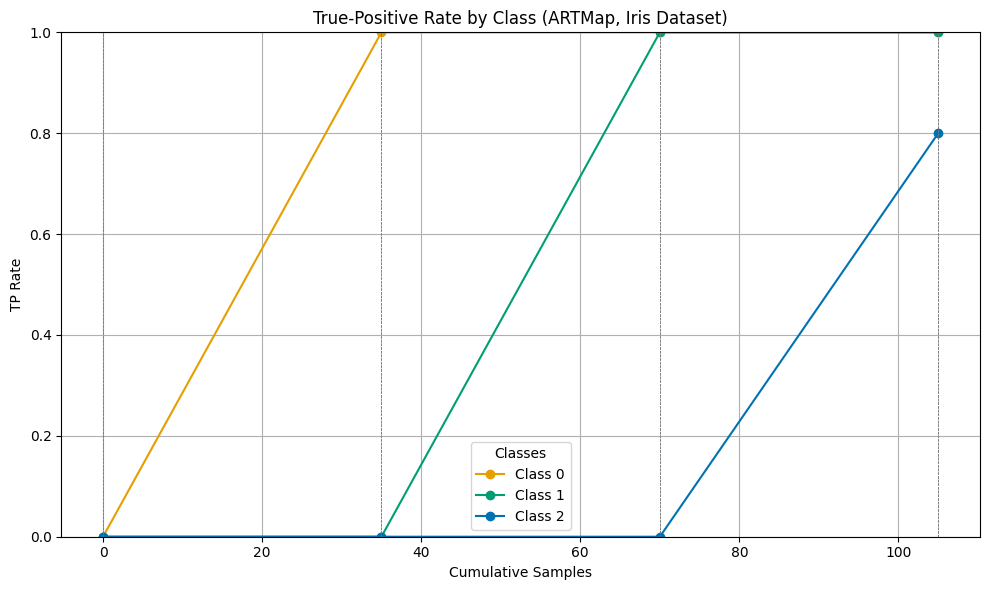

In [6]:
# import matplotlib.pyplot as plt
# from matplotlib.cm import viridis
# from sklearn import datasets
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import precision_score, accuracy_score, f1_score, recall_score, confusion_matrix
# import numpy as np
# from artlib import SimpleARTMAP, HypersphereART, GaussianART

# # Define constants
# RANDOM_STATE = 42
# SHUFFLE = False

# HYPERSPHERE_ARTMAP_PARAMS = {
#     "rho": 1.0,  # Vigilance parameter set to 1.0
#     "alpha": 1e-10,
#     "sigma_init": np.array(4*[0.1])
# }

# # Function for step-based training and metric collection
# def step_train(cls, X_train, y_train, X_test, y_test):
#     metrics = []
#     target_names = sorted(np.unique(y_test).tolist())

#     # Identify class-change indices to form batches
#     change_indices = np.where(np.diff(np.sort(y_train)) != 0)[0] + 1
#     change_indices = np.concatenate(([0], change_indices, [len(y_train)]))
#     batch_idxs = list(zip(change_indices[:-1], change_indices[1:]))

#     # Train over batches
#     for batch_num, (start_idx, end_idx) in enumerate(batch_idxs):
#         X_batch = X_train[start_idx:end_idx]
#         y_batch = y_train[start_idx:end_idx]

#         print(f"Batch {batch_num + 1}: Start {start_idx}, End {end_idx}, Classes {np.unique(y_batch)}")

#         # Perform partial fit on batch
#         cls = cls.partial_fit(X_batch, y_batch)
#         y_pred = cls.predict(X_test)

#         print(f"Predictions after Batch {batch_num + 1}: {y_pred}")

#         # Compute evaluation metrics
#         acc = accuracy_score(y_test, y_pred)
#         pre = precision_score(y_test, y_pred, average="weighted", zero_division=np.nan)
#         f1 = f1_score(y_test, y_pred, average="weighted", zero_division=np.nan)
#         rec = recall_score(y_test, y_pred, average="weighted", zero_division=np.nan)
#         cfm = confusion_matrix(y_test, y_pred)

#         acc_by_class = {
#             str(name): (sum(y_pred[y_test == name] == name) / sum(y_test == name))
#             for name in target_names
#         }

#         metrics.append(
#             {
#                 "batch_start": start_idx,
#                 "batch_end": end_idx,
#                 "accuracy": acc,
#                 "precision": pre,
#                 "f1": f1,
#                 "recall": rec,
#                 "confusion_matrix": cfm,
#                 "accuracy_by_class": acc_by_class,
#                 "batch_size": end_idx - start_idx,
#             }
#         )
    
#     return metrics

# # Load and prepare data
# iris = datasets.load_iris()
# X_train, X_test, y_train, y_test = train_test_split(
#     iris.data, iris.target, test_size=0.3, random_state=RANDOM_STATE, stratify=iris.target
# )

# # Sort for consistent batches (optional)
# train_indices = np.argsort(y_train)
# test_indices = np.argsort(y_test)
# X_train, y_train = X_train[train_indices], y_train[train_indices]
# X_test, y_test = X_test[test_indices], y_test[test_indices]

# unique, counts = np.unique(y_train, return_counts=True)
# print("Class distribution in training set:", dict(zip(unique, counts)))

# # Initialize ARTMap
# artmap = SimpleARTMAP(GaussianART(**HYPERSPHERE_ARTMAP_PARAMS))

# # Calculate global min and max for normalization
# DMAX = np.max(np.concatenate([X_train, X_test], axis=0), axis=0)
# DMIN = np.min(np.concatenate([X_train, X_test], axis=0), axis=0)
# artmap.module_a.d_max_ = DMAX
# artmap.module_a.d_min_ = DMIN

# # Prepare data for the model
# X_train_local = artmap.prepare_data(X_train)
# X_test_local = artmap.prepare_data(X_test)

# # Train using step-based approach
# metrics = step_train(artmap, X_train_local, y_train, X_test_local, y_test)

# # Plotting results
# tol_colors = ["#E69F00", "#009E73", "#0072B2"]  # Colors for the classes
# target_names = sorted(np.unique(y_train))

# fig, ax = plt.subplots(figsize=(10, 6))

# # Extract cumulative batch sizes for plotting
# cumulative_batch_sizes = np.cumsum([m["batch_size"] for m in metrics]).tolist()
# cumulative_batch_sizes.insert(0, 0)

# # Plot TP rate for each class across batches
# for i, target in enumerate(target_names):
#     tp_rates = [0]  # Start at 0 for initial reference
#     for metric in metrics:
#         tp_rates.append(metric["accuracy_by_class"][str(target)])

#     ax.plot(
#         cumulative_batch_sizes,
#         tp_rates,
#         label=f"Class {target}",
#         color=tol_colors[i % len(tol_colors)],
#         marker='o'
#     )

#     # Add vertical lines at batch boundaries
#     for x_point in cumulative_batch_sizes:
#         ax.axvline(x=x_point, color='gray', linestyle='--', linewidth=0.5)

# # Add labels, legend, and title
# ax.set_title("True-Positive Rate by Class (ARTMap, Iris Dataset)")
# ax.set_xlabel("Cumulative Samples")
# ax.set_ylabel("TP Rate")
# ax.set_ylim(0, 1)
# ax.grid(True)
# ax.legend(title="Classes")

# plt.tight_layout()
# plt.show()


[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 2 2 2 2
 2 2 1 2 2 2 2 2]


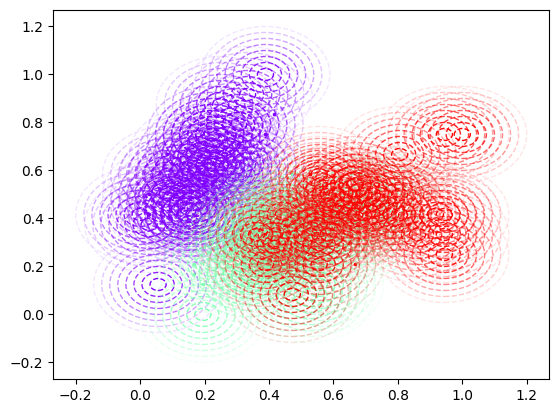

In [7]:

# y_pred = artmap.predict(X_test_local)
# artmap.visualize(X_test_local, y_pred)
# print(y_pred)

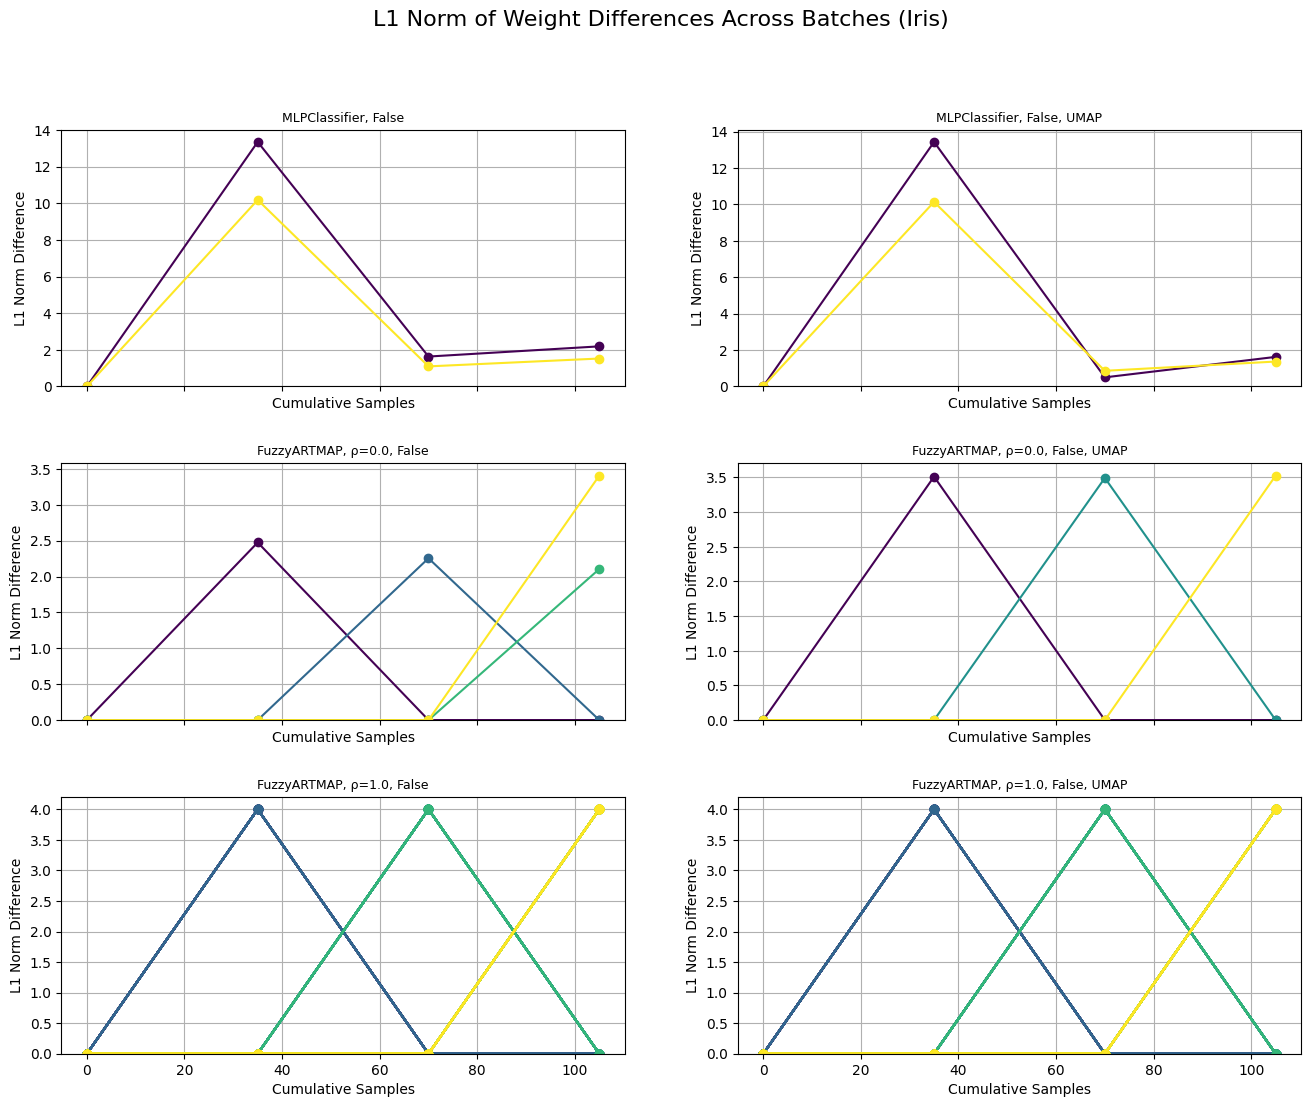

In [24]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from matplotlib.cm import viridis

# Load the parquet data
data1 = pd.read_parquet("iris.parquet")
data1 = data1.assign(prep=None)

data2 = pd.read_parquet("iris_umap.parquet")
data2 = data2.assign(prep="umap")
data = pd.concat([data1, data2], ignore_index=True)

def rename(row):
    if "ART" in row["model"]:
        return f"{row['model']}, ρ={row['rho']}"
    return row["model"]

data["model"] = data.apply(lambda row: rename(row), axis=1)

def rename_shuffle(row):
    if row["prep"] is not None:
        return f"{row['shuffle']}, UMAP"
    else:
        return row["shuffle"]

data["shuffle"] = data.apply(lambda row: rename_shuffle(row), axis=1)

# Function to calculate L1 differences with padding
def calculate_l1_diffs(weights_across_batches, shapes_across_batches, model_name, model_type, biases_across_batches=None):
    l1_diffs_by_class = []
    prev_class_weights = {}

    # Find the maximum number of classes across all batches
    max_classes = max(len(batch) for batch in weights_across_batches)

    # For each batch, track L1 diffs for all classes
    for batch_idx in range(len(weights_across_batches)):
        current_l1_diffs = []

        for class_idx in range(len(weights_across_batches[batch_idx])):
            curr_weight = np.array(weights_across_batches[batch_idx][class_idx]).flatten()

            if model_type == "MLP":
                # Include biases if available
                if biases_across_batches is not None:
                    curr_bias = np.array(biases_across_batches[batch_idx][class_idx]).flatten()
                    curr_weight = np.concatenate([curr_weight, curr_bias])  # Combine weights and biases

                if batch_idx == 0:
                    current_l1_diffs.append(custom_norm(curr_weight, model_type))  # First batch
                else:
                    prev_weight = np.array(weights_across_batches[batch_idx - 1][class_idx]).flatten()

                    if biases_across_batches is not None:
                        prev_bias = np.array(biases_across_batches[batch_idx - 1][class_idx]).flatten()
                        prev_weight = np.concatenate([prev_weight, prev_bias])  # Combine previous weights and biases

                    current_l1_diffs.append(custom_norm(curr_weight - prev_weight, model_type))

            else:  # For ART models
                specific_art_model = get_specific_art_model(model_name)

                if class_idx not in prev_class_weights:
                    current_l1_diffs.append(custom_norm(curr_weight, specific_art_model))  # New class
                    prev_class_weights[class_idx] = curr_weight
                else:
                    prev_weight = prev_class_weights[class_idx]
                    current_l1_diffs.append(custom_norm(curr_weight - prev_weight, specific_art_model))
                    prev_class_weights[class_idx] = curr_weight  # Update previous weight

        # Pad the current batch’s L1 diffs if necessary
        current_l1_diffs = np.pad(current_l1_diffs, (0, max_classes - len(current_l1_diffs)), constant_values=0)
        l1_diffs_by_class.append(current_l1_diffs)

    return np.array(l1_diffs_by_class).T  # Transpose to get L1 diffs per class

def get_specific_art_model(model_name):
    if "FuzzyART" in model_name:
        return "FuzzyART"
    elif "GaussianART" in model_name:
        return "GaussianART"
    elif "HypersphereART" in model_name:
        return "HypersphereART"
    else:
        raise ValueError(f"Unknown ART model: {model_name}")

def custom_norm(weight, model_type):
    if model_type == "FuzzyART":
        # Naive L1 norm
        return np.sum(np.abs(weight))

    elif model_type == "GaussianART":
        # Decompose the weight into its components [mean, sigma]
        d = len(weight) // 2  # Split into [mean, sigma]
        mean, sigma = weight[:d], weight[d:2*d]

        # Apply the custom norm for mean and sigma
        return np.sum(np.abs(mean)) + np.sum(np.abs(sigma))

    elif model_type == "HypersphereART":
        # Split into [centroid, radius]
        d = len(weight) - 1
        centroid, radius = weight[:d], weight[d]

        # L1 norm for centroid, absolute difference for radius
        return np.sum(np.abs(centroid)) + np.abs(radius)

    elif model_type == "MLP":
        # Simple L1 norm for weights and biases combined
        return np.sum(np.abs(weight))

    else:
        raise ValueError(f"Unknown model type: {model_type}")

# Create subplots with a larger figure size to accommodate legends
models = sorted(data["model"].unique().tolist())
M = len(models)
fig, ax = plt.subplots(M, 2, figsize=(16, 12), sharex=True)

for m, model in enumerate(models):
    for s, shuffle in enumerate(["False", "False, UMAP"]):
        experiment_data = data[(data["model"] == model) & (data["shuffle"] == shuffle)]

        if experiment_data.empty:
            continue

        # Extract weights, shapes, and batch sizes for the experiment
        weights_across_batches = experiment_data["weights_across_batches"].iloc[0]
        shapes_across_batches = experiment_data["shapes_across_batches"].iloc[0]
        model_type = experiment_data["model_type"].iloc[0]
        model_name = experiment_data["model"].iloc[0]  # Use this to disambiguate ART models
        batch_sizes = experiment_data["batch_size"].iloc[0]
        
        # Get biases for MLP models if available
        biases_across_batches = experiment_data["biases_across_batches"].iloc[0] if "biases_across_batches" in experiment_data else None

        # Calculate L1 differences
        l1_diffs_by_class = calculate_l1_diffs(weights_across_batches, shapes_across_batches, model_name, model_type, biases_across_batches)

        # Cumulative batch sizes for plotting
        x = np.cumsum(batch_sizes).tolist()
        x.insert(0, 0)  # Insert initial point at 0 samples

        # Dynamic color map based on the number of lines to be plotted
        cmap = viridis(np.linspace(0, 1, l1_diffs_by_class.shape[0]))

        # Filter out NaN/Inf values and find the max L1 norm difference
        valid_diffs = l1_diffs_by_class[np.isfinite(l1_diffs_by_class)].flatten()
        max_l1_diff = np.max(valid_diffs) * 1.05 if valid_diffs.size > 0 else 1e-5  # Default small value if empty

        for class_idx in range(l1_diffs_by_class.shape[0]):
            y = l1_diffs_by_class[class_idx, :].tolist()
            y.insert(0, 0)  # Initial L1 diff is 0

            # Plot L1 norm differences for each class (or concatenated MLP weights)
            ax[m, s].plot(x, y, marker='o', color=cmap[class_idx], label=f"Class {class_idx + 1}" if "ART" in model else model)

        # Set dynamic y-scale for each subplot
        ax[m, s].set_ylim(0, max_l1_diff)

        ax[m, s].set_title(f"{model.replace('ART', 'ARTMAP').replace('CustomMLP', 'MLP')}, {shuffle}", fontsize=9)
        ax[m, s].set_xlabel("Cumulative Samples")
        ax[m, s].set_ylabel("L1 Norm Difference")
        ax[m, s].grid()

# Global title and layout adjustments
fig.suptitle("L1 Norm of Weight Differences Across Batches (Iris)", fontsize=16, y=0.98)
fig.subplots_adjust(top=0.88, hspace=0.3)

plt.savefig("L1_norm_differences_iris.png")
plt.show()
